<a href="https://colab.research.google.com/github/shubhusararthy/StartHere-Internship/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK 2 - Iris Flower Classification

**Project Type** - Classification

**Industry** - StartHere

**Contribution** - Individual

**Name** - Shubhangini Sarathy

#Project Summary


This project demonstrates linear regression to predict student scores based on study hours. It uses the scikit-learn library to create and train the model, visualizing the data with a regression line. Additionally, the same model is built using the statsmodels library, which provides more statistical details, like p-values and confidence intervals. The project compares the two approaches and discusses the importance of such models in predicting outcomes based on available data.

#Problem Statement

The goal of this project is to develop a machine learning model that predicts student grades based on their academic performance data. Using features such as study hours, previous grades, and other relevant factors, the model will classify students into performance categories. The objective is to automate the grade prediction process, providing insights that can help in personalized education strategies and academic planning. This model can be valuable in educational institutions for tracking and improving student performance.

#Code

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


Read Data

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/shubhusararthy/StartHere-Internship/main/score.csv")


Get some information

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


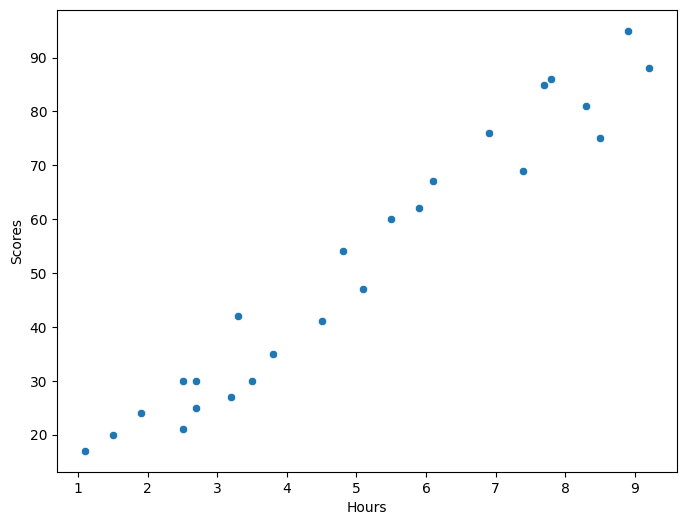

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(df,x='Hours',y='Scores')
plt.show()


Splitting the data

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.2)


Build the model

In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

Test the model

In [ ]:
model.coef_

array([[9.81639637]])

In [ ]:
model.intercept_

array([2.18454247])

In [ ]:
Y_test[:4]

array([[69],
       [30],
       [42],
       [27]])

In [ ]:
Y_pred=model.predict(X_test)
Y_pred[:4]

array([[74.82587562],
       [28.68881267],
       [34.57865049],
       [33.59701086]])

In [ ]:
df2=pd.DataFrame({'Actual':Y_test.flatten(),'Predicted':Y_pred.flatten()})
df2

,Actual,Predicted
0,69,74.825876
1,30,28.688813
2,42,34.578650
3,27,33.597011
4,76,69.917677


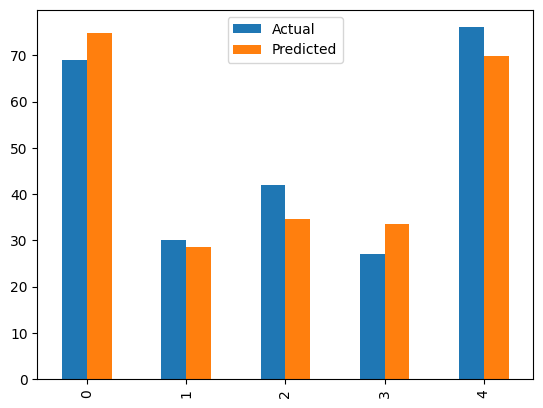

In [ ]:
df2.plot(kind='bar')
plt.show()

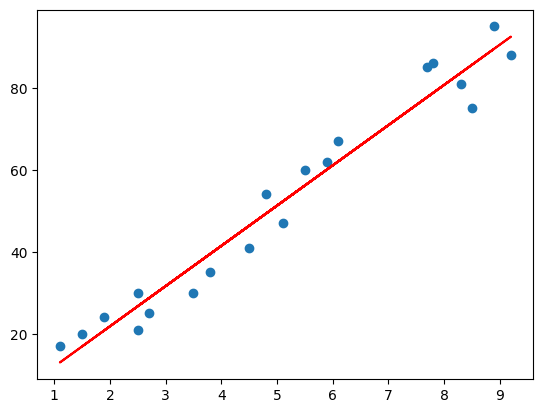

In [ ]:
# for training data
plt.scatter(X_train,Y_train)
plt.plot(X_train,model.predict(X_train),color='red')
plt.show()

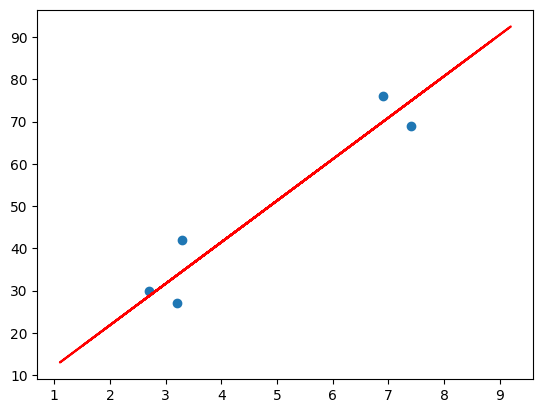

In [ ]:
# for testing data
plt.scatter(X_test,Y_test)
plt.plot(X_train,model.predict(X_train),color='red')
plt.show()

#Test the Accuracy

In [ ]:
# Accuracy for training data
r2_score(Y_train,model.predict(X_train))

0.9584820923958458

In [ ]:
# Accuracy for testing data
r2_score(Y_test,Y_pred)

0.915339298259056

Build the same model using statsmodels¶

In [ ]:
X_stat=sm.add_constant(X_train)
model2=sm.OLS(Y_train,X_stat).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     415.5
Date:                Fri, 03 Jan 2025   Prob (F-statistic):           6.93e-14
Time:                        08:45:32   Log-Likelihood:                -61.544
No. Observations:                  20   AIC:                             127.1
Df Residuals:                      18   BIC:                             129.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1845      2.746      0.796      0.437      -3.584       7.953
x1             9.8164      0.482     20.385      0.000       8.805      10.828
==============================================================================
Omnibus:                        3.905   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                1.597
Skew:                          -0.293   Prob(JB):                        0.450
Kurtosis:                       1.745   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Conclusion

The project concludes that linear regression effectively predicts student scores based on study hours, demonstrating a clear positive relationship between the two variables. Using both scikit-learn and statsmodels, the analysis highlights the importance of selecting appropriate methods for predictive modeling, with statsmodels providing deeper statistical insights. The study underscores the potential for machine learning in educational analytics to enhance decision-making.